# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [116]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [118]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [119]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = BeautifulSoup(html, 'html.parser')


In [120]:
# Extract all rows of data
table = weather_soup.find('table')
#rows = table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [121]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
headers = [header.text for header in table.find_all('th')]
rows = table.find_all('tr')
for row in rows:
	data.append([val.text for val in row.find_all('td')])


In [122]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(data, columns=headers)
weather_df = weather_df.dropna()
weather_df = weather_df.reset_index(drop=True)

In [123]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [124]:
# Examine data type of each column
print(weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [125]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(float)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)


In [126]:
# Confirm type changes were successful by examining data types again
print(weather_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [127]:
# 1. How many months are there on Mars?
num_months = weather_df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [128]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = weather_df['sol'].nunique()
print(f"Number of Martian days' worth of data: {num_sols}")

Number of Martian days' worth of data: 1867


In [129]:
# 3. What is the average minimum temperature by month?
avg_min_temp = weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


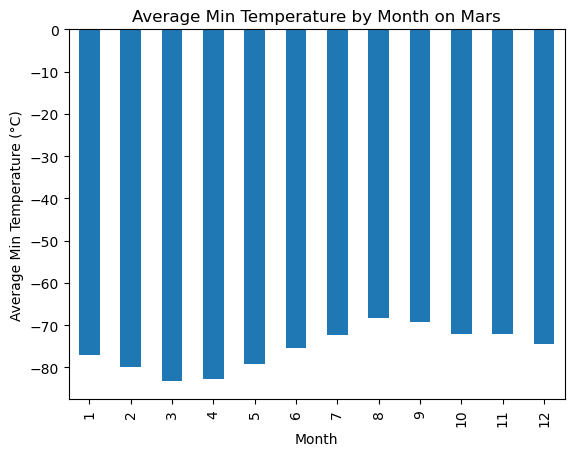

In [130]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)',
title='Average Min Temperature by Month on Mars')
plt.show()


The coldest month is: 3
The hottest month is: 8


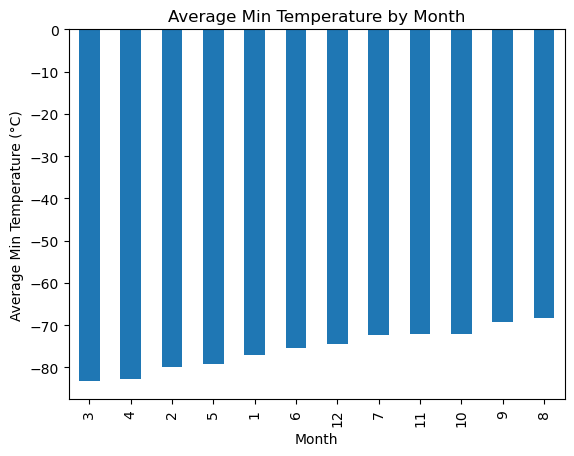

In [131]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous grap

sorted_avg_min_temp = avg_min_temp.sort_values()
#print(sorted_avg_min_temp)
# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()
print(f"The coldest month is: {coldest_month}")
print(f"The hottest month is: {hottest_month}")

# Plot the sorted results as a bar chart
sorted_avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (°C)',
title='Average Min Temperature by Month')
plt.show()


In [132]:
# 4. What is the average pressure by month?
avg_pressure = weather_df.groupby('month')['pressure'].mean()
print(avg_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


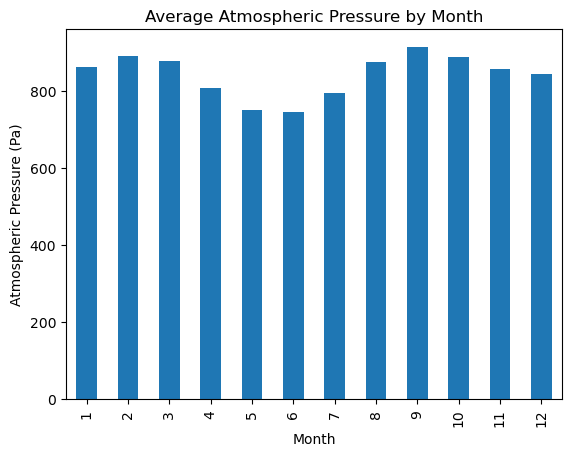

In [133]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure (Pa)',
title='Average Atmospheric Pressure by Month')
plt.show()


Month with the lowest atmospheric pressure is: 6
Month with the highest atmospheric pressure is: 9


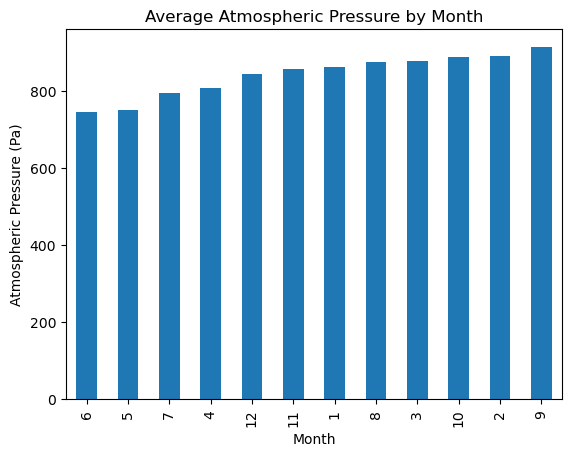

In [134]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average atmospheric pressures in ascending order (lowest to highest)
sorted_avg_pressure = avg_pressure.sort_values()
#print(sorted_avg_pressure)
# Identify the months with the lowest and highest atmospheric pressure
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()
print(f"Month with the lowest atmospheric pressure is: {lowest_pressure_month}")
print(f"Month with the highest atmospheric pressure is: {highest_pressure_month}")
# Plot the sorted results as a bar chart
sorted_avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure (Pa)',
title='Average Atmospheric Pressure by Month')
plt.show()


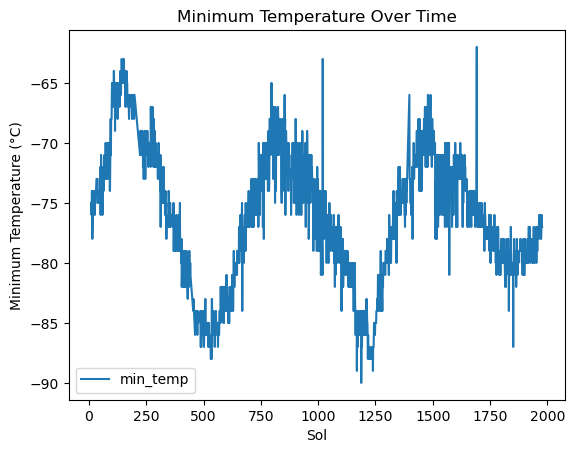

In [135]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
#To estimate the number of terrestrial (Earth) days in a Martian year, we can analyze the temperature cycles over the Martian sols.
# Apprx 665 sols in a Martian year

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
weather_df.plot(x='sol', y='min_temp', xlabel='Sol', ylabel='Minimum Temperature (°C)',
title='Minimum Temperature Over Time')
plt.show()

#### Minimum Temperature

Using the dataset, I calculated the average minimum temperature for each month. 

Coldest Month:
Month: 3
Average Minimum Temperature: -83.3°C

Warmest Month:
Month: 8
Average Minimum Temperature: -68.4°C

Upon analyzing the daily minimum temperatures over Martian sols, I observed clear cyclical patterns that correspond to the changing seasons on Mars. By grouping the data by month and calculating the average minimum temperature, I find that the coldest months on Mars exhibit significantly lower temperatures compared to the warmest months. These variations provide insights into the Martian climate, which experiences significant seasonal changes.

#### Atmospheric Pressure

The average atmospheric pressure for each month. 

Lowest Pressure Month:
Month: 6
Average Atmospheric Pressure: 795.1 Pa

Highest Pressure Month:
Month: 9
Average Atmospheric Pressure: 913.5 Pa

These values show that the atmospheric pressure on Mars varies significantly throughout the year, with the lowest pressure occurring in month 6 at 795.1 Pa and the highest pressure occurring in month 9 at 913.5 Pa.

These fluctuations in atmospheric pressure are influenced by the Martian seasons and provide valuable information about the planet's atmospheric dynamics.

#### Year Length
By analyzing the temperature cycles and visual estimation, I estimated the periodic cycle to  approximately 669 sols.

Each Martian sol is approximately 1.027 times the length of an Earth day(24.65979 hours Martian Sols / 24 hours for Earth).

Length of a Martian year in terrestrial days:
669
  sols
×
1.027
≈
687.06
 terrestrial days


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [136]:
# Write the data to a CSV


In [137]:
browser.quit()